In [273]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [274]:
df = pd.read_csv('bus_delay-winter-2019.csv')

In [275]:
df['datetime'] = df['Report Date'] + ' ' + df['Time']

In [276]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14202 entries, 0 to 14201
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Report Date  14202 non-null  object        
 1   Route        14202 non-null  int64         
 2   Time         14202 non-null  object        
 3   Day          14202 non-null  object        
 4   Location     14186 non-null  object        
 5   Incident     14202 non-null  object        
 6   Delay        14129 non-null  float64       
 7   Gap          14115 non-null  float64       
 8   Direction    13821 non-null  object        
 9   Vehicle      12108 non-null  float64       
 10  datetime     14202 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 1.2+ MB


In [278]:
df = df[(df['datetime'] >'2019-11-27') & (df['datetime'] < '2020-01-05')]

In [279]:
df['dow'] = df['datetime'].dt.weekday

In [280]:
df['hour'] = df['datetime'].dt.hour

In [281]:
df['minute'] = df['datetime'].dt.minute

In [282]:
df[df['datetime'].dt.date.astype(str) == '2019-12-02'].sort_values(by = 'Delay', ascending = False)

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Direction,Vehicle,datetime,dow,hour,minute
5609,02-Dec-19,161,5:00:00 AM,Monday,Louvain and Humber Blvd,Diversion,999.0,999.0,E/B,NaN,2019-12-02 05:00:00,0,5,0
5826,02-Dec-19,108,4:09:00 PM,Monday,Driftwood / Sentinel,Diversion,90.0,99.0,N/B,3324.0,2019-12-02 16:09:00,0,16,9
5667,02-Dec-19,984,6:35:00 AM,Monday,arrow garage,Mechanical,66.0,132.0,W/B,3274.0,2019-12-02 06:35:00,0,6,35
5680,02-Dec-19,26,7:00:00 AM,Monday,Dupont route,General Delay,40.0,40.0,B/W,NaN,2019-12-02 07:00:00,0,7,0
5738,02-Dec-19,189,8:00:00 AM,Monday,Along route,General Delay,35.0,60.0,B/W,NaN,2019-12-02 08:00:00,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5722,02-Dec-19,600,7:42:00 AM,Monday,Wilson Garage,Utilized Off Route,0.0,0.0,NaN,8214.0,2019-12-02 07:42:00,0,7,42
5817,02-Dec-19,34,3:27:00 PM,Monday,Eglinton Yard,Mechanical,0.0,0.0,OB,8802.0,2019-12-02 15:27:00,0,15,27
5816,02-Dec-19,954,3:21:00 PM,Monday,Eglinton Yard,Mechanical,0.0,0.0,OB,8735.0,2019-12-02 15:21:00,0,15,21
5815,02-Dec-19,986,3:20:00 PM,Monday,Eglinton Yard,Mechanical,0.0,0.0,OB,8700.0,2019-12-02 15:20:00,0,15,20


In [283]:
df[df['Incident'] == 'General Delay']

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Direction,Vehicle,datetime,dow,hour,minute
4636,27-Nov-19,87,5:23:00 AM,Wednesday,BROADVIEW STATION,General Delay,6.0,12.0,E/B,NaN,2019-11-27 05:23:00,2,5,23
4687,27-Nov-19,47,9:50:00 AM,Wednesday,Bloor to Queen,General Delay,20.0,25.0,S/B,NaN,2019-11-27 09:50:00,2,9,50
4710,27-Nov-19,39,12:00:00 PM,Wednesday,39 Finch Route-All Branch,General Delay,16.0,32.0,B/W,3444.0,2019-11-27 12:00:00,2,12,0
4711,27-Nov-19,939,12:00:00 PM,Wednesday,939 Finch Express-all Branch,General Delay,14.0,28.0,B/W,1332.0,2019-11-27 12:00:00,2,12,0
4765,27-Nov-19,935,3:00:00 PM,Wednesday,Jane Station to Pioneer Village Station,General Delay,25.0,35.0,B/W,NaN,2019-11-27 15:00:00,2,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10115,03-Jan-20,36,8:00:00 AM,Friday,Finch Ave EW/ highway 400,General Delay,15.0,20.0,W/B,NaN,2020-01-03 08:00:00,4,8,0
10172,03-Jan-20,9,5:00:00 PM,Friday,Warden STN to Scarborough Centre STN,General Delay,15.0,42.0,B/W,NaN,2020-01-03 17:00:00,4,17,0
10203,04-Jan-20,307,4:00:00 AM,Saturday,Route 307,General Delay,16.0,46.0,B/W,NaN,2020-01-04 04:00:00,5,4,0
10221,04-Jan-20,64,9:00:00 AM,Saturday,64 Main Station to Queen/Wineva,General Delay,10.0,20.0,B/W,NaN,2020-01-04 09:00:00,5,9,0


In [284]:
df[df['Gap']/df['Delay'] == 2]

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Direction,Vehicle,datetime,dow,hour,minute
4629,27-Nov-19,41,12:03:00 AM,Wednesday,Keele and St Clair,Investigation,10.0,20.0,S/B,9037.0,2019-11-27 00:03:00,2,0,3
4630,27-Nov-19,116,12:30:00 AM,Wednesday,Kennedy Station,Mechanical,10.0,20.0,E/B,8924.0,2019-11-27 00:30:00,2,0,30
4631,27-Nov-19,22,12:50:00 AM,Wednesday,Bingham ave and Kington Rd,Mechanical,10.0,20.0,W/B,8400.0,2019-11-27 00:50:00,2,0,50
4632,27-Nov-19,85,1:48:00 AM,Wednesday,Donmills Station,Investigation,26.0,52.0,E/B,3428.0,2019-11-27 01:48:00,2,1,48
4633,27-Nov-19,22,2:12:00 AM,Wednesday,Danforth and Lee ave.,Mechanical,20.0,40.0,E/B,8517.0,2019-11-27 02:12:00,2,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10289,04-Jan-20,35,10:33:00 PM,Saturday,Jane and Wilson,Mechanical,8.0,16.0,N/B,3185.0,2020-01-04 22:33:00,5,22,33
10290,04-Jan-20,60,10:44:00 PM,Saturday,Keele and Steeles,Diversion,10.0,20.0,W/B,0.0,2020-01-04 22:44:00,5,22,44
10291,04-Jan-20,134,10:45:00 PM,Saturday,Finchdene and Finch,Vision,22.0,44.0,N/B,3489.0,2020-01-04 22:45:00,5,22,45
10292,04-Jan-20,9,11:20:00 PM,Saturday,Bellamy and Eglinton,Emergency Services,30.0,60.0,N/B,8525.0,2020-01-04 23:20:00,5,23,20


In [285]:
df[df['Gap']%df['Delay'] == 0]

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Direction,Vehicle,datetime,dow,hour,minute
4629,27-Nov-19,41,12:03:00 AM,Wednesday,Keele and St Clair,Investigation,10.0,20.0,S/B,9037.0,2019-11-27 00:03:00,2,0,3
4630,27-Nov-19,116,12:30:00 AM,Wednesday,Kennedy Station,Mechanical,10.0,20.0,E/B,8924.0,2019-11-27 00:30:00,2,0,30
4631,27-Nov-19,22,12:50:00 AM,Wednesday,Bingham ave and Kington Rd,Mechanical,10.0,20.0,W/B,8400.0,2019-11-27 00:50:00,2,0,50
4632,27-Nov-19,85,1:48:00 AM,Wednesday,Donmills Station,Investigation,26.0,52.0,E/B,3428.0,2019-11-27 01:48:00,2,1,48
4633,27-Nov-19,22,2:12:00 AM,Wednesday,Danforth and Lee ave.,Mechanical,20.0,40.0,E/B,8517.0,2019-11-27 02:12:00,2,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10289,04-Jan-20,35,10:33:00 PM,Saturday,Jane and Wilson,Mechanical,8.0,16.0,N/B,3185.0,2020-01-04 22:33:00,5,22,33
10290,04-Jan-20,60,10:44:00 PM,Saturday,Keele and Steeles,Diversion,10.0,20.0,W/B,0.0,2020-01-04 22:44:00,5,22,44
10291,04-Jan-20,134,10:45:00 PM,Saturday,Finchdene and Finch,Vision,22.0,44.0,N/B,3489.0,2020-01-04 22:45:00,5,22,45
10292,04-Jan-20,9,11:20:00 PM,Saturday,Bellamy and Eglinton,Emergency Services,30.0,60.0,N/B,8525.0,2020-01-04 23:20:00,5,23,20


In [286]:
df.sort_values(by = 'Delay', ascending = False).head(20)

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Direction,Vehicle,datetime,dow,hour,minute
7877,16-Dec-19,9,4:00:00 AM,Monday,SCARBOROUGH TOWN CENTRE,Diversion,999.0,999.0,S/B,NaN,2019-12-16 04:00:00,0,4,0
8004,17-Dec-19,9,4:00:00 AM,Tuesday,SCARBOROUGH TOWN CENTRE,Diversion,999.0,999.0,S/B,NaN,2019-12-17 04:00:00,1,4,0
7817,15-Dec-19,38,7:54:00 AM,Sunday,Scarborough Town Centre,Diversion,999.0,999.0,E/B,1639.0,2019-12-15 07:54:00,6,7,54
7819,15-Dec-19,129,8:00:00 AM,Sunday,Scarborough Town Centre,Diversion,999.0,999.0,E/B,1313.0,2019-12-15 08:00:00,6,8,0
5609,02-Dec-19,161,5:00:00 AM,Monday,Louvain and Humber Blvd,Diversion,999.0,999.0,E/B,NaN,2019-12-02 05:00:00,0,5,0
7878,16-Dec-19,16,4:00:00 AM,Monday,SCARBOROUGH TOWN CENTRE,Diversion,999.0,999.0,S/B,NaN,2019-12-16 04:00:00,0,4,0
7879,16-Dec-19,169,4:00:00 AM,Monday,SCARBOROUGH TOWN CENTRE,Diversion,999.0,999.0,W/B,NaN,2019-12-16 04:00:00,0,4,0
5908,03-Dec-19,42,8:33:00 AM,Tuesday,McNicoll and Hines,Diversion,999.0,999.0,B/W,8322.0,2019-12-03 08:33:00,1,8,33
6006,04-Dec-19,42,5:00:00 AM,Wednesday,McNicoll and Hines,Diversion,999.0,999.0,B/W,8354.0,2019-12-04 05:00:00,2,5,0
7880,16-Dec-19,38,4:00:00 AM,Monday,SCARBOROUGH TOWN CENTRE,Diversion,999.0,999.0,B/W,NaN,2019-12-16 04:00:00,0,4,0


In [287]:
len(df[df['Delay'].isna()])

26

In [288]:
df['Incident'].drop_duplicates()

4629                       Investigation
4630                          Mechanical
4634                  Utilized Off Route
4636                       General Delay
4643    Late Leaving Garage - Mechanical
4665      Late Leaving Garage - Operator
4682                           Diversion
4750                              Vision
4782                  Emergency Services
4838        Late Leaving Garage - Vision
4894    Late Leaving Garage - Management
Name: Incident, dtype: object

In [289]:
df['date_str'] = df['datetime'].dt.date.astype(str)

In [290]:
df.groupby(['date_str', 'Route']).count().sort_values(by = 'Report Date', ascending = False)

Report Date  Time  Day  Location  Incident  Delay  Gap  \
date_str   Route                                                           
2019-11-28 600             19    19   19        19        19     19   19   
2019-11-29 600             16    16   16        16        16     16   16   
2019-12-27 36              15    15   15        15        15     15   15   
2019-11-29 54              13    13   13        13        13     13   13   
2019-11-27 600             12    12   12        12        12     12   12   
...                       ...   ...  ...       ...       ...    ...  ...   
2019-12-18 24               1     1    1         1         1      1    1   
           23               1     1    1         1         1      1    1   
           12               1     1    1         1         1      1    1   
2019-11-28 48               1     1    1         1         1      1    1   
2019-12-13 960              1     1    1         1         1      1    1   

                  Direction  Vehicle  datetime  dow  hour  minute  
date_str   Route                                                   
2019-11-28 600            6       19        19   19    19      19  
2019-11-29 600            4       16        16   16    16      16  
2019-12-27 36            15       15        15   15    15      15  
2019-11-29 54             9       13        13   13    13      13  
2019-11-27 600            7       12        12   12    12      12  
...                     ...      ...       ...  ...   ...     ...  
2019-12-18 24             1        1         1    1     1       1  
           23             1        0         1    1     1       1  
           12             1        1         1    1     1       1  
2019-11-28 48             1        1         1    1     1       1  
2019-12-13 960            1        1         1    1     1       1  

[2941 rows x 13 columns]

In [291]:
df[(df['Route'] == 36) & (df['date_str'] == '2019-12-27')]

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Direction,Vehicle,datetime,dow,hour,minute,date_str
9305,27-Dec-19,36,9:30:00 AM,Friday,Finch / Keele,Mechanical,5.0,10.0,E/B,9112.0,2019-12-27 09:30:00,4,9,30,2019-12-27
9308,27-Dec-19,36,11:25:00 AM,Friday,Finch west stn,Mechanical,5.0,10.0,E/B,3578.0,2019-12-27 11:25:00,4,11,25,2019-12-27
9311,27-Dec-19,36,12:27:00 PM,Friday,Finch / Arrow,Mechanical,5.0,10.0,E/B,9130.0,2019-12-27 12:27:00,4,12,27,2019-12-27
9314,27-Dec-19,36,12:42:00 PM,Friday,Finch West stn,Utilized Off Route,5.0,10.0,E/B,3595.0,2019-12-27 12:42:00,4,12,42,2019-12-27
9316,27-Dec-19,36,12:45:00 PM,Friday,Finch West stn,Utilized Off Route,5.0,10.0,E/B,9110.0,2019-12-27 12:45:00,4,12,45,2019-12-27
9322,27-Dec-19,36,12:50:00 PM,Friday,Finch west stn,Utilized Off Route,5.0,5.0,E/B,3192.0,2019-12-27 12:50:00,4,12,50,2019-12-27
9331,27-Dec-19,36,12:56:00 PM,Friday,Finch west stn,Utilized Off Route,5.0,5.0,E/B,3327.0,2019-12-27 12:56:00,4,12,56,2019-12-27
9334,27-Dec-19,36,12:59:00 PM,Friday,Finch west stn,Utilized Off Route,5.0,5.0,E/B,9133.0,2019-12-27 12:59:00,4,12,59,2019-12-27
9339,27-Dec-19,36,1:10:00 PM,Friday,Finch west stn,Utilized Off Route,5.0,5.0,E/B,9123.0,2019-12-27 13:10:00,4,13,10,2019-12-27
9346,27-Dec-19,36,1:18:00 PM,Friday,Finch west stn,Utilized Off Route,5.0,5.0,W/B,3361.0,2019-12-27 13:18:00,4,13,18,2019-12-27


In [292]:
df[df['Incident'] == 'General Delay'].sort_values(by = ['Route', 'datetime']).head(50)

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Direction,Vehicle,datetime,dow,hour,minute,date_str
5274,29-Nov-19,5,5:00:00 PM,Friday,Entire Route,General Delay,20.0,40.0,B/W,NaN,2019-11-29 17:00:00,4,17,0,2019-11-29
5549,01-Dec-19,5,4:00:00 PM,Sunday,On route,General Delay,10.0,10.0,B/W,NaN,2019-12-01 16:00:00,6,16,0,2019-12-01
5930,03-Dec-19,5,1:00:00 PM,Tuesday,Entire route,General Delay,30.0,40.0,B/W,NaN,2019-12-03 13:00:00,1,13,0,2019-12-03
6759,08-Dec-19,5,3:00:00 PM,Sunday,On route,General Delay,30.0,30.0,B/W,NaN,2019-12-08 15:00:00,6,15,0,2019-12-08
8386,19-Dec-19,5,2:00:00 PM,Thursday,Entire route,General Delay,30.0,60.0,B/W,NaN,2019-12-19 14:00:00,3,14,0,2019-12-19
7506,12-Dec-19,6,8:00:00 PM,Thursday,Queen to Front,General Delay,15.0,25.0,B/W,NaN,2019-12-12 20:00:00,3,20,0,2019-12-12
9904,31-Dec-19,6,8:00:00 PM,Tuesday,Queen St to Gerrard St,General Delay,15.0,30.0,B/W,NaN,2019-12-31 20:00:00,1,20,0,2019-12-31
5470,01-Dec-19,9,9:00:00 AM,Sunday,Bellamy route,General Delay,15.0,1.0,B/W,NaN,2019-12-01 09:00:00,6,9,0,2019-12-01
7292,11-Dec-19,9,5:00:00 PM,Wednesday,Scarborough town Centre to Ellesmere,General Delay,120.0,1.0,B/W,NaN,2019-12-11 17:00:00,2,17,0,2019-12-11
8706,21-Dec-19,9,10:00:00 AM,Saturday,Bellamy route,General Delay,10.0,1.0,S/B,NaN,2019-12-21 10:00:00,5,10,0,2019-12-21


In [293]:
clean_list = []

for index, row in df.iterrows():
    if 600 <= row['Route'] < 900:
        continue
        
    new_hour = row['hour']
    delay = row['Delay']
    minute = row['minute']
    new_date = row['datetime'].date()
    new_dow = new_dow = new_date.weekday()
    clean_list.append([row['datetime'].date(), row['dow'], row['hour'], row['Route']])
    
    if delay + minute > 60:

            
        for i in range(int((delay + minute)/60)):
            new_hour = new_hour + 1
            if new_hour > 23:
                new_hour = new_hour - 24
                new_date = row['datetime'].date() + datetime.timedelta(days=1)
                new_dow = new_date.weekday()

            clean_list.append([new_date, new_dow, new_hour, row['Route']])       

    else:
        pass

In [294]:
cleaned = pd.DataFrame.from_records(clean_list, columns = ['date', 'dow', 'hour', 'route'])
cleaned

,date,dow,hour,route
0,2019-11-27,2,0,41
1,2019-11-27,2,0,116
2,2019-11-27,2,0,22
3,2019-11-27,2,1,85
4,2019-11-27,2,2,85
...,...,...,...,...
6826,2020-01-04,5,22,60
6827,2020-01-04,5,22,134
6828,2020-01-04,5,23,134
6829,2020-01-04,5,23,9


In [295]:
cleaned = cleaned[~cleaned['date'].astype(str).isin(['2019-12-24', '2019-12-25', '2019-12-26', '2019-12-31', '2020-01-01'])].copy()

In [296]:
cleaned['period'] = None

In [297]:
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([7,8,9])), 'AM', cleaned['period'])
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([4,5,6])), 'EM', cleaned['period'])
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([11,12,13])), 'MD', cleaned['period'])
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([17,18,19])), 'PM', cleaned['period'])
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([20,21,22])), 'EV', cleaned['period'])

In [298]:
cleaned = cleaned[(~cleaned['period'].isna()) ].reset_index(drop = True)
cleaned

,date,dow,hour,route,period
0,2019-11-27,2,5,87,EM
1,2019-11-27,2,5,21,EM
2,2019-11-27,2,5,113,EM
3,2019-11-27,2,5,54,EM
4,2019-11-27,2,5,17,EM
...,...,...,...,...,...
3177,2020-01-03,4,21,165,EV
3178,2020-01-03,4,22,24,EV
3179,2020-01-03,4,22,36,EV
3180,2020-01-03,4,22,96,EV


In [299]:
cleaned = cleaned.drop_duplicates()

In [300]:
summary = cleaned.groupby(['date', 'period']).count()[['route']].reset_index().rename(columns = {'route':'incidents'})

In [301]:
len(summary[summary['period'] == 'AM'])

23

In [302]:
summary[summary['period'] == 'AM'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
15,2019-12-02,AM,74
55,2019-12-12,AM,49
35,2019-12-06,AM,49
10,2019-11-29,AM,45
100,2019-12-30,AM,40
85,2019-12-20,AM,37
65,2019-12-16,AM,29
75,2019-12-18,AM,27
110,2020-01-03,AM,27
40,2019-12-09,AM,27


In [303]:
summary[summary['period'] == 'PM'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
54,2019-12-11,PM,43
64,2019-12-13,PM,38
69,2019-12-16,PM,36
74,2019-12-17,PM,34
39,2019-12-06,PM,33
59,2019-12-12,PM,32
84,2019-12-19,PM,31
9,2019-11-28,PM,30
79,2019-12-18,PM,30
44,2019-12-09,PM,29


In [304]:
summary[summary['period'] == 'MD'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
98,2019-12-27,MD,47
3,2019-11-27,MD,43
93,2019-12-23,MD,40
73,2019-12-17,MD,36
83,2019-12-19,MD,30
18,2019-12-02,MD,27
63,2019-12-13,MD,25
23,2019-12-03,MD,24
38,2019-12-06,MD,23
43,2019-12-09,MD,23


In [305]:
summary[summary['period'] == 'EV'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
62,2019-12-13,EV,27
37,2019-12-06,EV,24
52,2019-12-11,EV,22
7,2019-11-28,EV,21
57,2019-12-12,EV,20
12,2019-11-29,EV,20
77,2019-12-18,EV,20
87,2019-12-20,EV,19
72,2019-12-17,EV,19
67,2019-12-16,EV,18


In [306]:
summary[summary['period'] == 'EM'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
16,2019-12-02,EM,60
46,2019-12-10,EM,48
86,2019-12-20,EM,47
51,2019-12-11,EM,45
6,2019-11-28,EM,45
41,2019-12-09,EM,41
71,2019-12-17,EM,34
31,2019-12-05,EM,32
61,2019-12-13,EM,32
66,2019-12-16,EM,32


In [307]:
plt.rcParams['figure.dpi'] = 300

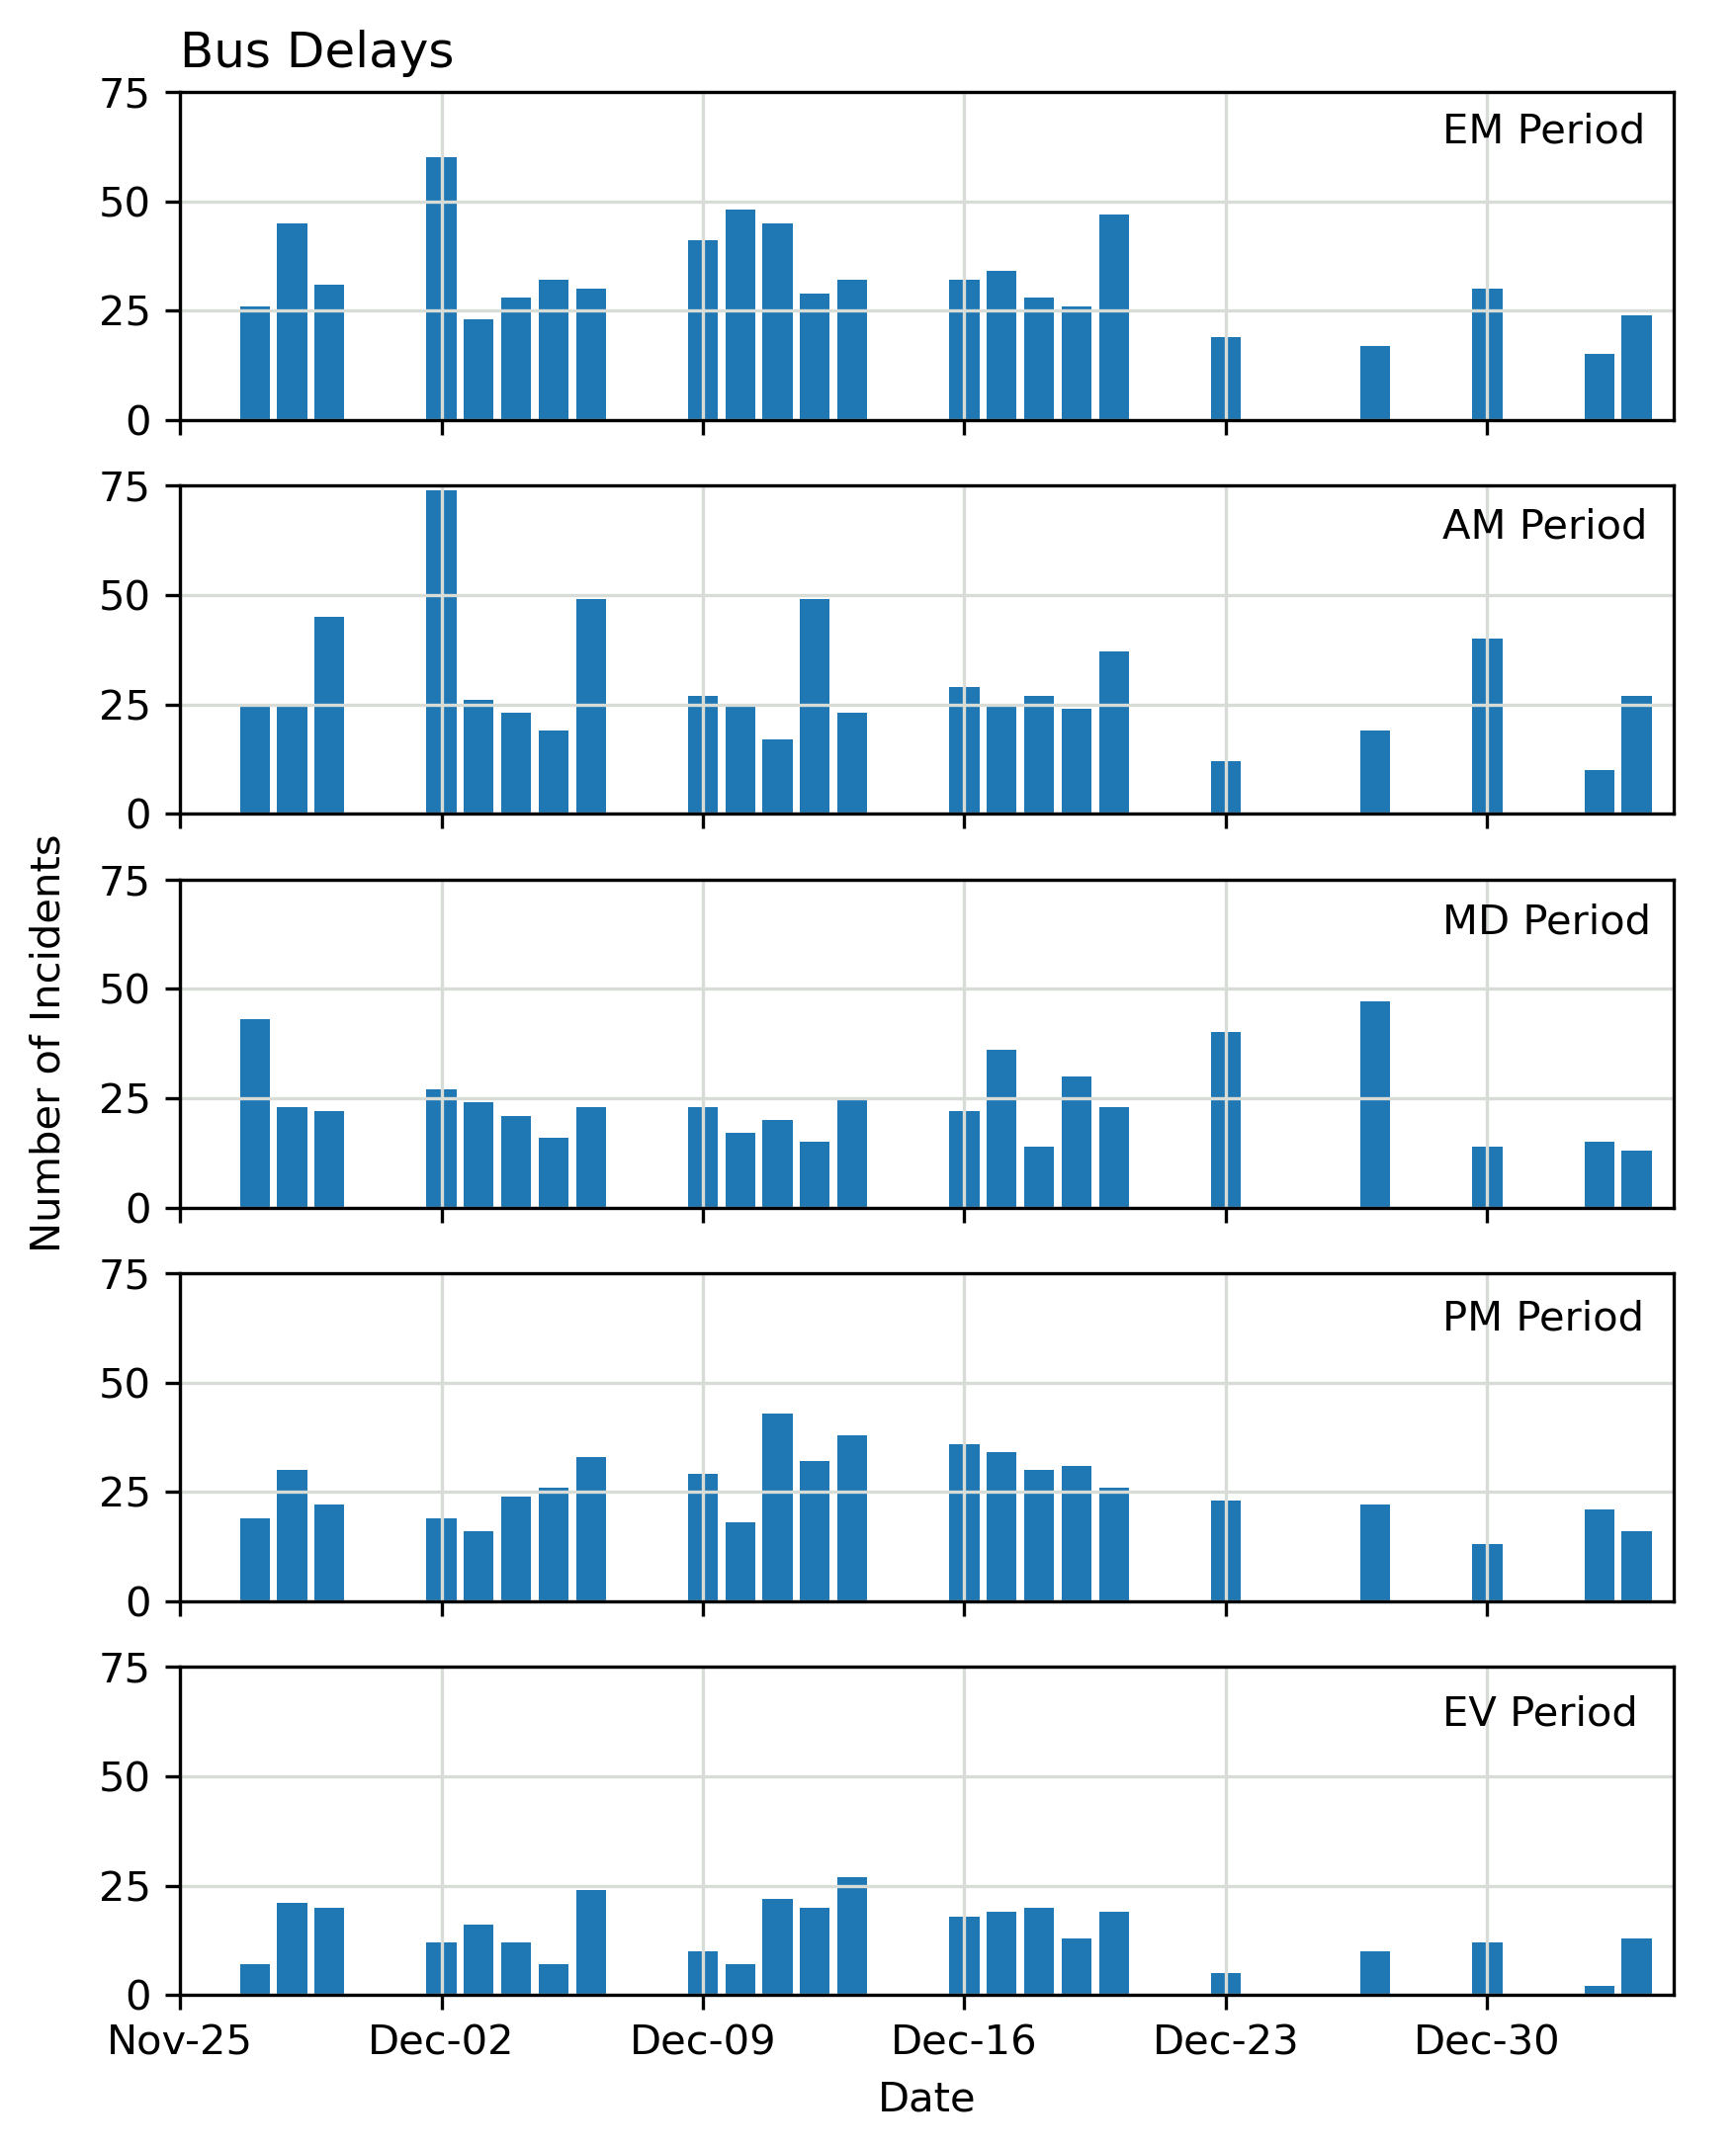

In [308]:
fig, ax = plt.subplots(5)

i = 0
y_str = 0.86

period_list = ['EM','AM','MD','PM','EV']

for period in period_list:
    
    df_sub = summary[summary['period'] == period]
    
    ax[i].bar(df_sub['date'], df_sub['incidents'])
    
    ax[i].set_xlim([datetime.date(2019,11,26), datetime.date(2020,1,4)])
    ax[i].set_ylim([0,75])
    
    ax[i].set_xticks([datetime.date(2019,11,25),
                     datetime.date(2019,12,2),
                     datetime.date(2019,12,9),
                     datetime.date(2019,12,16),
                     datetime.date(2019,12,23),
                     datetime.date(2019,12,30)])


    if i in [0,1,2,3]:
        ax[i].set_xticklabels('')
    else:
        ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    
        
    fig.text(s = period + ' Period', x = 0.78, y = y_str)

    ax[i].grid(color = 'xkcd:light grey')
    
    
    
    i = i + 1
    y_str = y_str - 0.157
    
fig.add_subplot(111, frameon=False)


plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.title('Bus Delays', ha = 'left', x = 0)

fig.set_size_inches(6.5,8.5)

plt.savefig('bus-delay-count.png', dpi = 300, bbox_inches = "tight")

In [309]:
summary.to_csv('bus_delay_summary.csv', index = False)
cleaned.to_csv('bus_cleaned.csv', index = False)